In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *
from analysis import *

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on GPU: ", device)
else:
    device = torch.device("cpu")
    print("Running on CPU")

torch.set_default_device(device)
# torch.cuda.synchronize()

Running on CPU


c:\Users\matti\anaconda3\envs\torch2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on CPU


## Model

In [2]:
hidden_size = 128
input_size = 1
nav_size = 1

model1 = RNN_circular_LowEtAl_bridged(input_size,hidden_size,lr=0.0001,irnn=True,outputnn=False,Wx_normalize=False,activation=True,bias=False,nav_space=1,batch_size=64).to(device)

train = False

if train:
    _ = model1.train_gradual(epochs=4000)
    # model1.base_training_tsteps = 50
    # _ = model1.train(epochs=2000)
    model1.plot_losses(average=30)
else:
    model1.load_state_dict(torch.load("../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt"))

# torch.save(model1.state_dict(), "../trained models/LowEtAl_bridged_reduced_Gradual_lossiequaloroverj_maskonangle_lossscale_4000gradual.pt")

In [3]:
_ = model1.train(epochs=10)

100%|██████████| 10/10 [00:00<00:00, 38.56it/s]


## Analysis

### Norm of activity per timestep

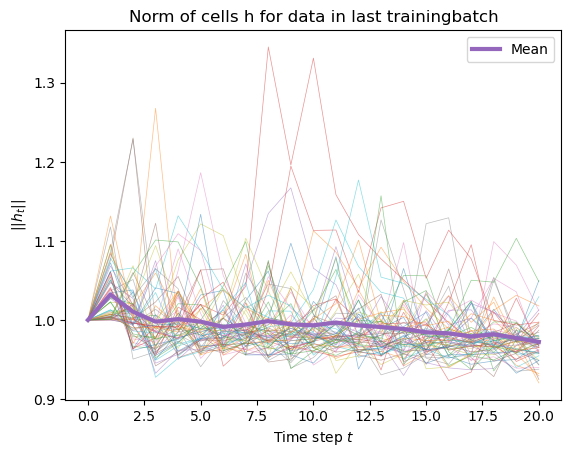

Mean norm:  0.9933146


In [4]:
htss = model1.hts.norm(dim=2)
htss = htss.cpu().detach().numpy()
plot_norm(htss,avg_only=False)

### Tuning curves

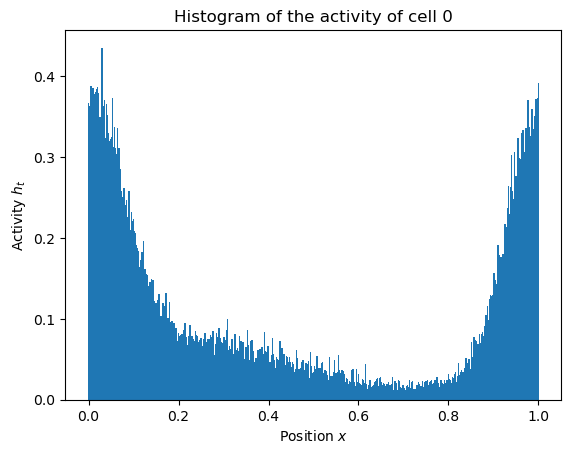

100%|██████████| 12/12 [00:16<00:00,  1.41s/it]


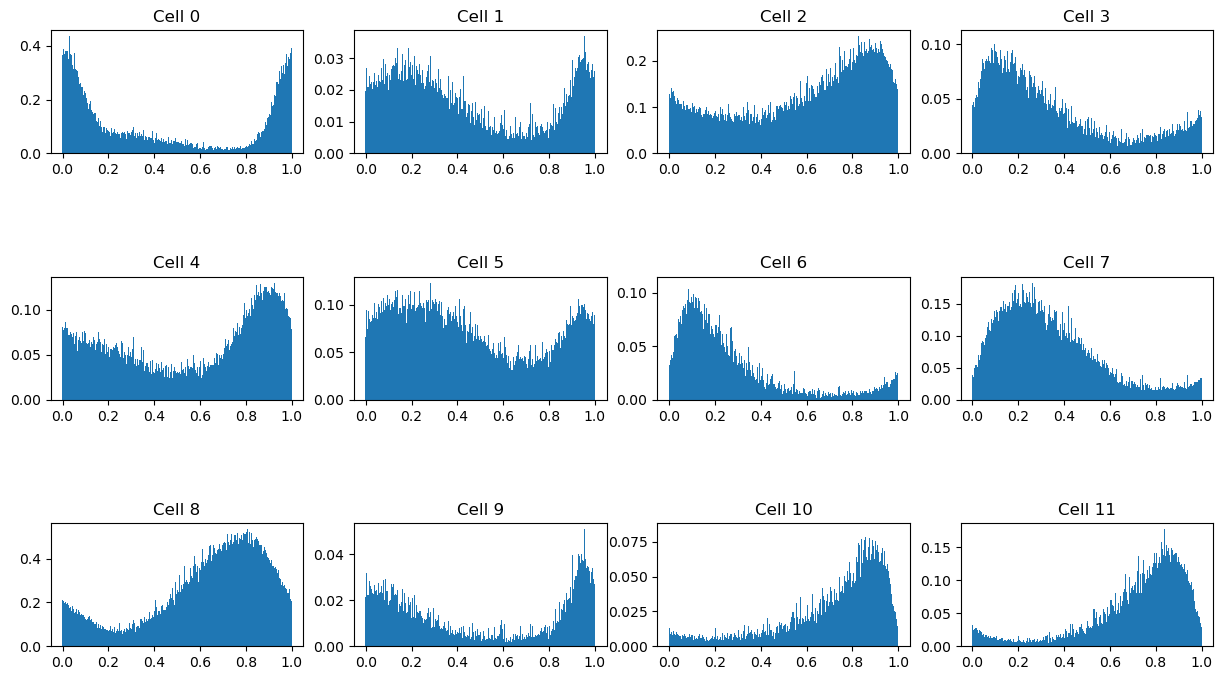

In [7]:
activity, bin_edges = tuning_curve(model1)
plot_tuning_curve(activity,bin_edges,0,spherical=False,linear=True,scale_to_one=True)

### Low dimensional representations

Explained variance for PCA with 2 components: 0.922852754229494 %


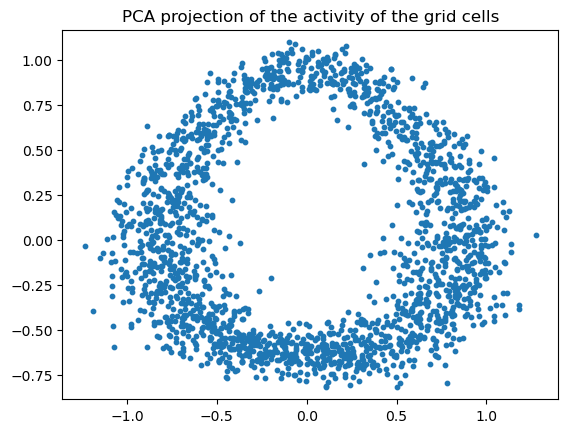

In [8]:
embedding, reducer = lowD_reduce(activity,if_pca=True,n_components=2,plot=True)

### Accuracy testing

In [11]:
angs, dy, err, y_hat, y = test_angle_inference(model1,reducer)


Mean error:  0.11527299900907917


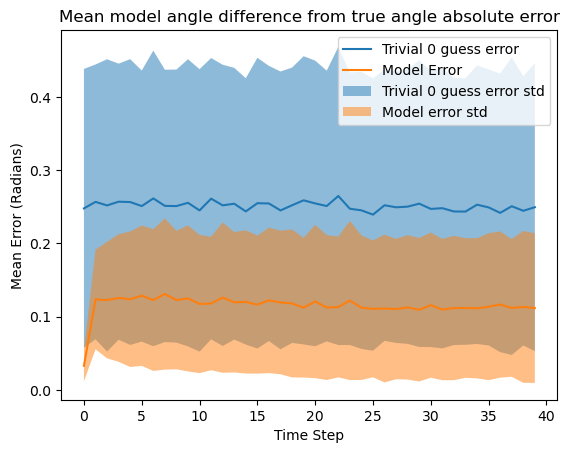

In [12]:
plot_accuracy(angs,dy,y_hat,y)

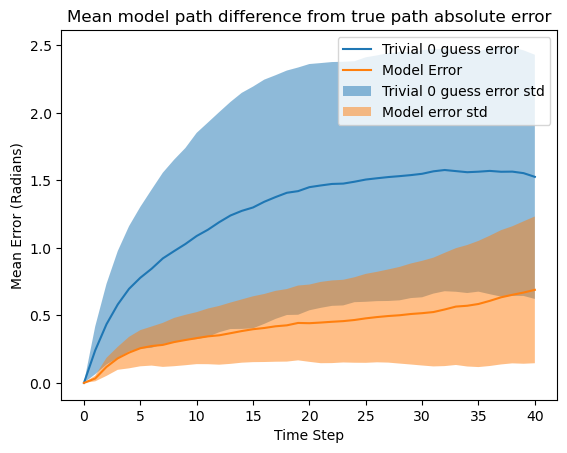

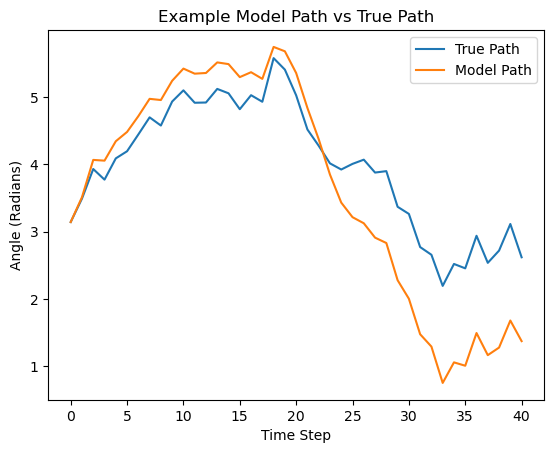

In [14]:
plot_path_accuracy(angs,y,example_path=0)